## 딥러닝

### 심층신경망

In [1]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지않음

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [21]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [22]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [23]:
print(train_scaled.shape,val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기1

In [24]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [25]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [26]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [33]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [37]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4669 - accuracy: 0.8371
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3554 - accuracy: 0.8725
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3197 - accuracy: 0.8868
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8935
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2750 - accuracy: 0.9023
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9069
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2440 - accuracy: 0.9124
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2319 - accuracy: 0.9177
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2197 - accuracy: 0.9212
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step -

In [ ]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.8%

375/375 [==============================] - 0s 867us/step - loss: 0.8298 - accuracy: 0.8753


[0.8298255801200867, 0.875333309173584]

In [45]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 816us/step


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [54]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [61]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    # plt.title('', fontsize=13)
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

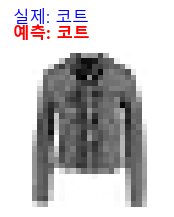

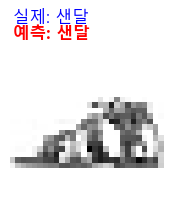

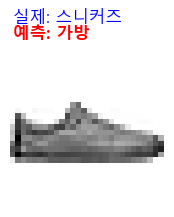

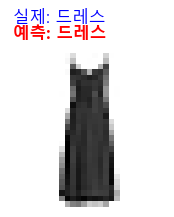

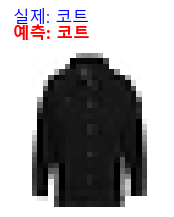

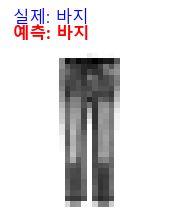

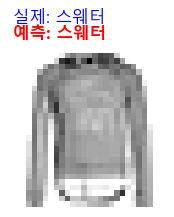

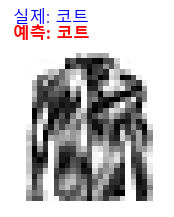

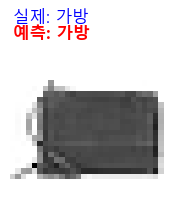

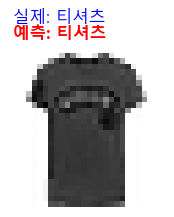

In [63]:
for i in range(10,20):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [64]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [65]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [69]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [70]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [71]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [72]:
# 모델훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5350 - accuracy: 0.8120
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3960 - accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3582 - accuracy: 0.8704
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8786
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3196 - accuracy: 0.8854
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8889
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2986 - accuracy: 0.8936
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2897 - accuracy: 0.8965
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2797 - accuracy: 0.9010
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.275

In [ ]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 940us/step - loss: 0.4299 - accuracy: 0.8788


[0.42990192770957947, 0.8788333535194397]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [80]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [81]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 모델훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5218 - accuracy: 0.8176
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3871 - accuracy: 0.8607
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3490 - accuracy: 0.8738
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3218 - accuracy: 0.8824
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.8878
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2872 - accuracy: 0.8947
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.8983
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2641 - accuracy: 0.9023
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9053
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.245

- optimizer사용시 0.01정도 개선

In [ ]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% 

375/375 [==============================] - 0s 868us/step - loss: 0.3442 - accuracy: 0.8867


[0.3441585600376129, 0.8867499828338623]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [84]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [85]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# 모델4 설정, 최적화는 adam클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [88]:
# 모델훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5955 - accuracy: 0.7923
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4438 - accuracy: 0.8399
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4089 - accuracy: 0.8518
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3856 - accuracy: 0.8589
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8651
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3567 - accuracy: 0.8682
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3448 - accuracy: 0.8725
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3375 - accuracy: 0.8747
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3331 - accuracy: 0.8772
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.323

In [ ]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8843


[0.33017802238464355, 0.8843333125114441]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터 만 저장하는 두가지 방법이 존재

In [91]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [92]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야

In [93]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'), 
    keras.layers.Dense(10, activation='softmax', name='output5')
], name='Fashion_MNIST_RELU5')

In [94]:
model5.load_weights('./model4-weight.h5')

In [98]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 807us/step


- 모델까지 전부 생성해주는 방법

In [99]:
model6 = keras.models.load_model('./model4-whole.h5')

In [100]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 922us/step - loss: 0.3573 - accuracy: 0.8793


[0.35728156566619873, 0.8792999982833862]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용.

In [102]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='Flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [103]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [104]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 자장
# 조기종료 콜백
# 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)   

In [105]:
# 모델훈련. 모델훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6004 - accuracy: 0.7897 - val_loss: 0.4423 - val_accuracy: 0.8464
Epoch 2/20
  81/1500 [>.............................] - ETA: 1s - loss: 0.4719 - accuracy: 0.8302

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 2ms/step - loss: 0.4478 - accuracy: 0.8400 - val_loss: 0.3999 - val_accuracy: 0.8521
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4095 - accuracy: 0.8515 - val_loss: 0.3661 - val_accuracy: 0.8634
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8595 - val_loss: 0.3510 - val_accuracy: 0.8716
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3695 - accuracy: 0.8644 - val_loss: 0.3473 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3603 - accuracy: 0.8672 - val_loss: 0.3492 - val_accuracy: 0.8722
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3477 - accuracy: 0.8736 - val_loss: 0.3389 - val_accuracy: 0.8758
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3399 - accuracy: 0.8736 - val_loss: 0.3414 - val_accuracy: 0.8762
Epo

In [106]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 915us/step - loss: 0.3242 - accuracy: 0.8842


[0.3242205083370209, 0.8841666579246521]

In [107]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 912us/step - loss: 0.3578 - accuracy: 0.8721


[0.3578352928161621, 0.8720999956130981]

In [108]:
early_stopp_cb.stopped_epoch

10

- 20번중 15번반복에서 조기종료

#### 결론
- `심츨 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam` SGD(확률적 경사하강법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것